In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


/kaggle/input/engage-2-value-from-clicks-to-conversions/sample_submission.csv
/kaggle/input/engage-2-value-from-clicks-to-conversions/train_data.csv
/kaggle/input/engage-2-value-from-clicks-to-conversions/test_data.csv


# Importing Libraries 

In [2]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.impute import SimpleImputer                 
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline                      # Build processing + modeling pipeline


from sklearn.model_selection import train_test_split # Splitting

  
from sklearn.linear_model import LinearRegression           
from sklearn.dummy import DummyClassifier, DummyRegressor   

#evaluation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Some Liberey is Imported!!")

Some Liberey is Imported!!


# Datasets

In [3]:
print("Our Datasets: Train.csv and Test.csv ")
train_data = pd.read_csv("/kaggle/input/engage-2-value-from-clicks-to-conversions/train_data.csv")
test_data = pd.read_csv("/kaggle/input/engage-2-value-from-clicks-to-conversions/test_data.csv")
print("Our Target: purchaseValue ")

Our Datasets: Train.csv and Test.csv 
Our Target: purchaseValue 


# Exploratory Data Analysis.

In [4]:
print("Columns of Datasets")
print(train_data.columns)
print("\n")
train_data.head()

Columns of Datasets
Index(['trafficSource.isTrueDirect', 'purchaseValue', 'browser',
       'device.screenResolution', 'trafficSource.adContent',
       'trafficSource.keyword', 'screenSize', 'geoCluster',
       'trafficSource.adwordsClickInfo.slot', 'device.mobileDeviceBranding',
       'device.mobileInputSelector', 'userId', 'trafficSource.campaign',
       'device.mobileDeviceMarketingName', 'geoNetwork.networkDomain',
       'gclIdPresent', 'device.operatingSystemVersion', 'sessionNumber',
       'device.flashVersion', 'geoNetwork.region', 'trafficSource',
       'totals.visits', 'geoNetwork.networkLocation', 'sessionId', 'os',
       'geoNetwork.subContinent', 'trafficSource.medium',
       'trafficSource.adwordsClickInfo.isVideoAd', 'browserMajor',
       'locationCountry', 'device.browserSize',
       'trafficSource.adwordsClickInfo.adNetworkType', 'socialEngagementType',
       'geoNetwork.city', 'trafficSource.adwordsClickInfo.page',
       'geoNetwork.metro', 'pageViews', 'l

,trafficSource.isTrueDirect,purchaseValue,browser,device.screenResolution,trafficSource.adContent,trafficSource.keyword,screenSize,geoCluster,trafficSource.adwordsClickInfo.slot,device.mobileDeviceBranding,...,device.language,deviceType,userChannel,device.browserVersion,totalHits,device.screenColors,sessionStart,geoNetwork.continent,device.isMobile,new_visits
0,NaN,0.0,Edge,not available in demo dataset,NaN,NaN,medium,Region_2,NaN,not available in demo dataset,...,not available in demo dataset,desktop,Social,not available in demo dataset,1,not available in demo dataset,1500100799,Americas,False,1.0
1,True,0.0,Chrome,not available in demo dataset,NaN,NaN,medium,Region_3,NaN,not available in demo dataset,...,not available in demo dataset,desktop,Direct,not available in demo dataset,1,not available in demo dataset,1495262065,Americas,False,1.0
2,True,0.0,Chrome,not available in demo dataset,NaN,(not provided),medium,Region_2,NaN,not available in demo dataset,...,not available in demo dataset,desktop,Organic Search,not available in demo dataset,6,not available in demo dataset,1508510328,Europe,False,NaN
3,NaN,0.0,Internet Explorer,not available in demo dataset,NaN,NaN,medium,Region_4,NaN,not available in demo dataset,...,not available in demo dataset,desktop,Social,not available in demo dataset,1,not available in demo dataset,1483431838,Asia,False,1.0
4,True,88950000.0,Chrome,not available in demo dataset,NaN,NaN,medium,Region_3,NaN,not available in demo dataset,...,not available in demo dataset,desktop,Direct,not available in demo dataset,66,not available in demo dataset,1475804633,Americas,False,1.0


In [5]:
print("Shape Of Train Datasets: ",train_data.shape)
print("Shape Of Test Datasets: ",test_data.shape)

Shape Of Train Datasets:  (116023, 52)
Shape Of Test Datasets:  (29006, 51)


In [6]:
print("Information Of Datasets")
train_data.info()

Information Of Datasets
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116023 entries, 0 to 116022
Data columns (total 52 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   trafficSource.isTrueDirect                    42890 non-null   object 
 1   purchaseValue                                 116023 non-null  float64
 2   browser                                       116023 non-null  object 
 3   device.screenResolution                       116023 non-null  object 
 4   trafficSource.adContent                       2963 non-null    object 
 5   trafficSource.keyword                         44162 non-null   object 
 6   screenSize                                    116023 non-null  object 
 7   geoCluster                                    116023 non-null  object 
 8   trafficSource.adwordsClickInfo.slot           4281 non-null    object 
 9   device.mobileDeviceBrand

**Conclusions**

- The dataset contains 52 columns:
1 bool, 5 float64, 9 int64, and 37 object (mostly categorical).

- A very high number of object columns (71%) suggests that categorical analysis is critica

- Task Type: Regression (target = purchaseValue),
 

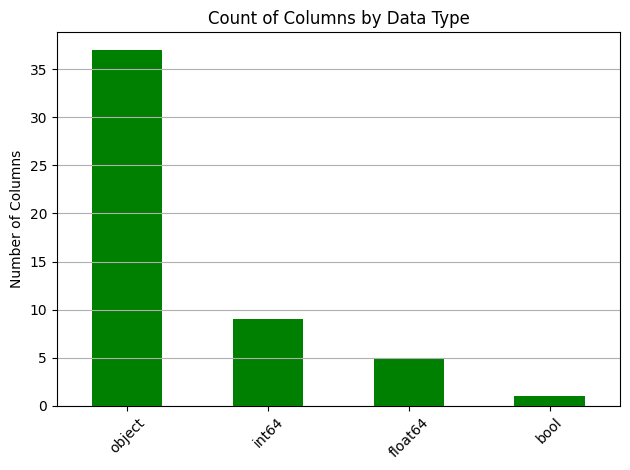

In [7]:

# Count of data types
dtype_counts = train_data.dtypes.value_counts()

# Bar plot
dtype_counts.plot(kind='bar', color='green')
plt.title("Count of Columns by Data Type")
plt.ylabel("Number of Columns")
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

In [8]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
purchaseValue,116023.0,2.656393e+07,2.051825e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.312950e+10
userId,116023.0,6.109436e+04,3.524076e+04,0.000000e+00,3.060350e+04,6.101400e+04,9.161650e+04,1.222760e+05
gclIdPresent,116023.0,3.701852e-02,1.888080e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
sessionNumber,116023.0,2.691311e+00,1.045161e+01,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,4.470000e+02
totals.visits,116023.0,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
sessionId,116023.0,1.493429e+09,1.528798e+07,1.470035e+09,1.480066e+09,1.491646e+09,1.505079e+09,1.525157e+09
trafficSource.adwordsClickInfo.page,4281.0,1.019622e+00,1.745165e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,5.000000e+00
pageViews,116015.0,8.412352e+00,1.434494e+01,1.000000e+00,1.000000e+00,2.000000e+00,1.000000e+01,4.690000e+02
locationZone,116023.0,8.000000e+00,0.000000e+00,8.000000e+00,8.000000e+00,8.000000e+00,8.000000e+00,8.000000e+00
totals.bounces,47148.0,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


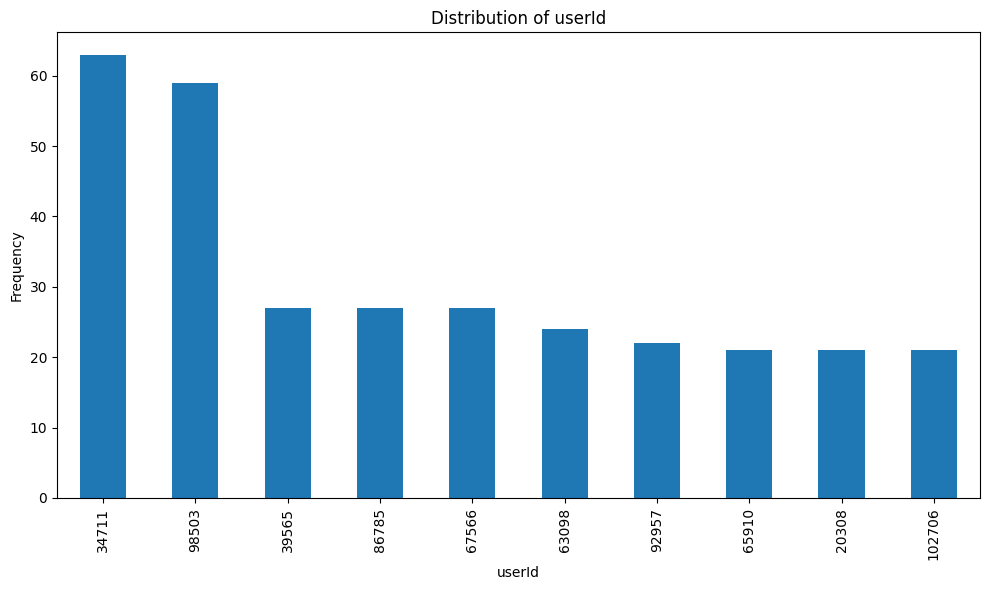

Number of unique users: 100499


In [9]:
user_counts = train_data["userId"].value_counts()

# Ploting the distribution
plt.figure(figsize=(10, 6))
user_counts[:10].plot(kind='bar')
plt.title("Distribution of userId")
plt.xlabel("userId")
plt.ylabel("Frequency")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
unique_user_count = train_data["userId"].nunique()
print("Number of unique users:", unique_user_count)

## **Numerical Columns Visuals**

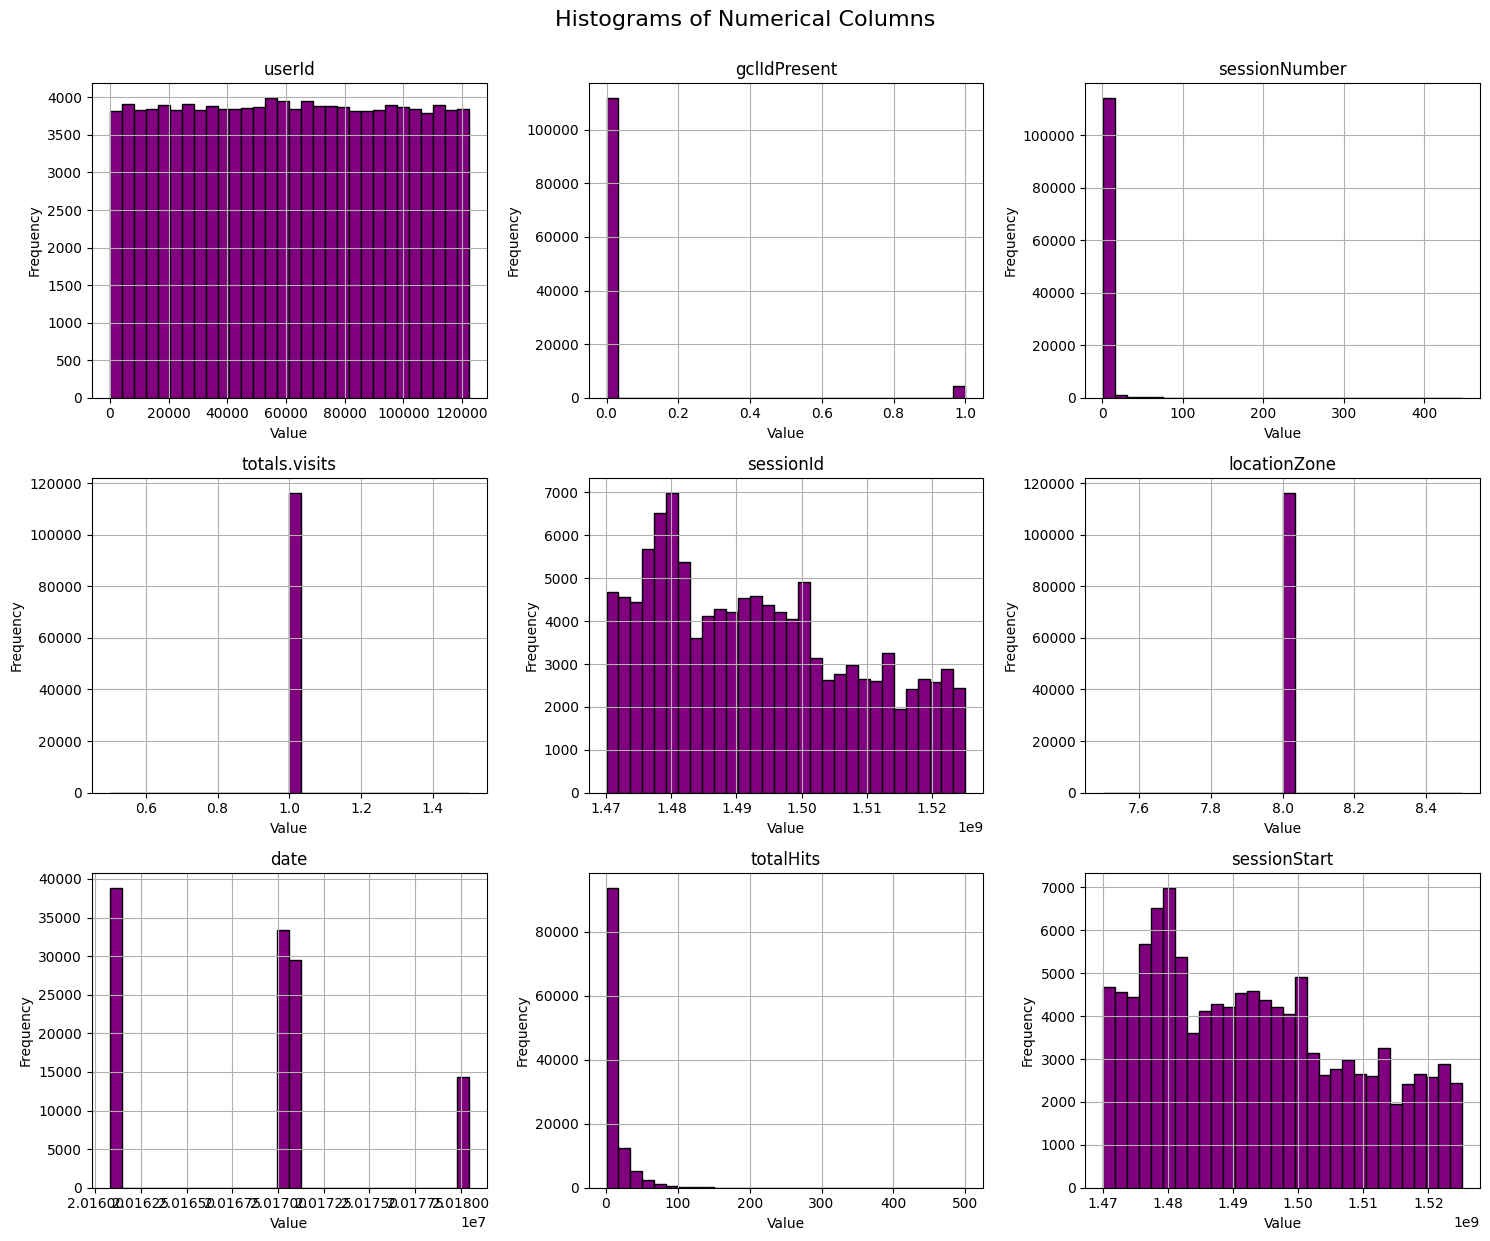

In [10]:
# Selecting numerical columns
numerical_cols = train_data.select_dtypes(include='int').columns

n_cols = 3  # number of plots per row
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols

plt.figure(figsize=(n_cols * 5, n_rows * 4))

# Ploting each numerical column
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    train_data[col].hist(bins=30, color='purple', edgecolor='black')
    plt.title(col)
    plt.xlabel('Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.suptitle("Histograms of Numerical Columns", fontsize=16, y=1.03)
plt.show()

**Missing Value %**

Total no of missing values in Train.csv: 882719
                                              miss_vals  Percentage
trafficSource.adContent                          113060   97.446196
trafficSource.adwordsClickInfo.adNetworkType     111742   96.310214
trafficSource.adwordsClickInfo.isVideoAd         111742   96.310214
trafficSource.adwordsClickInfo.page              111742   96.310214
trafficSource.adwordsClickInfo.slot              111742   96.310214
trafficSource.referralPath                        73309   63.184886
trafficSource.isTrueDirect                        73133   63.033192
trafficSource.keyword                             71861   61.936857
totals.bounces                                    68875   59.363230
new_visits                                        35505   30.601691
pageViews                                             8    0.006895


Text(0.5, 0, 'Percentage of missing values')

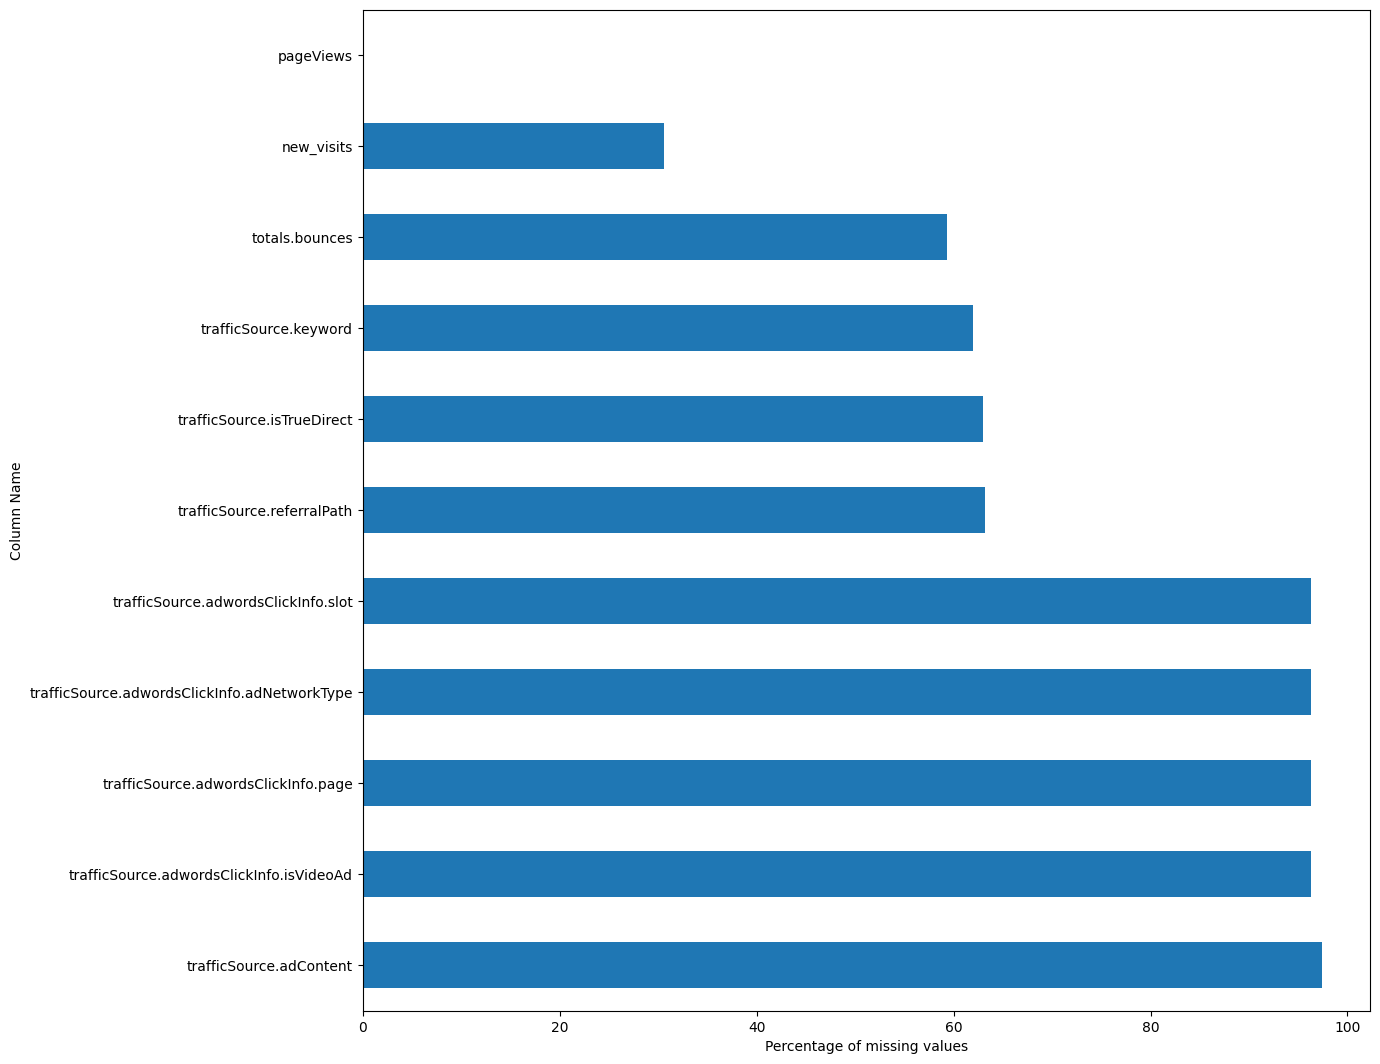

In [11]:
#Find the missing value in train dataset
miss_vals = train_data.isna().sum().sort_values(ascending = False)
print('Total no of missing values in Train.csv:', miss_vals.sum())

#Columns with missing values and in percentage
miss_vals_percent = miss_vals[miss_vals !=0]/len(train_data)*100
missing_data = pd.DataFrame({'miss_vals': miss_vals, 'Percentage': miss_vals_percent})
missing_data = missing_data[missing_data['miss_vals'] > 0]
print(missing_data.sort_values(by='Percentage', ascending=False))

#ploting 
miss_vals_percent[miss_vals !=0].plot(kind = 'barh' , figsize = (13,13));
plt.ylabel('Column Name')
plt.xlabel('Percentage of missing values')

## Numerical columns VS Target columns


Correlation of numerical columns with target:
totalHits                              0.251651
pageViews                              0.248454
sessionNumber                          0.230585
userId                                -0.003469
gclIdPresent                          -0.005652
date                                  -0.010338
sessionStart                          -0.018537
sessionId                             -0.018537
trafficSource.adwordsClickInfo.page   -0.025839
totals.visits                               NaN
locationZone                                NaN
totals.bounces                              NaN
new_visits                                  NaN
Name: purchaseValue, dtype: float64


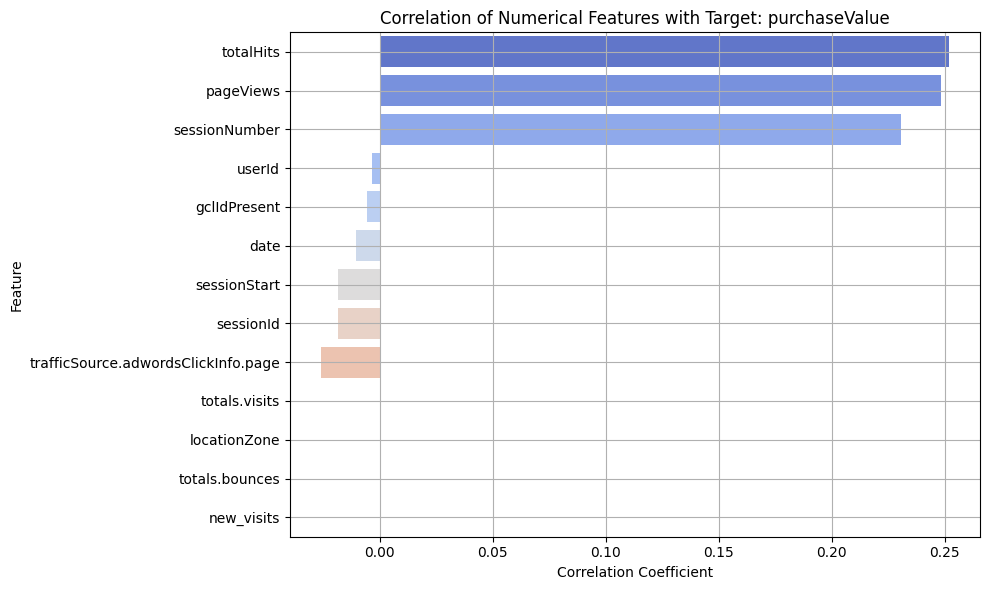

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Separate numerical columns (excluding the target)
numerical_cols = train_data.select_dtypes(include=['int64', 'float64']).columns.tolist()
target_col = 'purchaseValue' 
numerical_cols = [col for col in numerical_cols if col != target_col]

# Calculate correlation with the target
correlation_with_target = train_data[numerical_cols + [target_col]].corr()[target_col].drop(target_col)

# Display sorted correlation values
print("\nCorrelation of numerical columns with target:")
print(correlation_with_target.sort_values(ascending=False))

# Plot correlation heatmap/barplot
plt.figure(figsize=(10, 6))
sns.barplot(
    x=correlation_with_target.sort_values(ascending=False).values,
    y=correlation_with_target.sort_values(ascending=False).index,
    palette="coolwarm"
)
plt.title(f'Correlation of Numerical Features with Target: {target_col}')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Feature')
plt.grid(True)
plt.tight_layout()
plt.show()

## Target Column Visualisation

Summary Statistics for Target Column:
count    1.160230e+05
mean     2.656393e+07
std      2.051825e+08
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.312950e+10
Name: purchaseValue, dtype: float64
Target Through Graphs


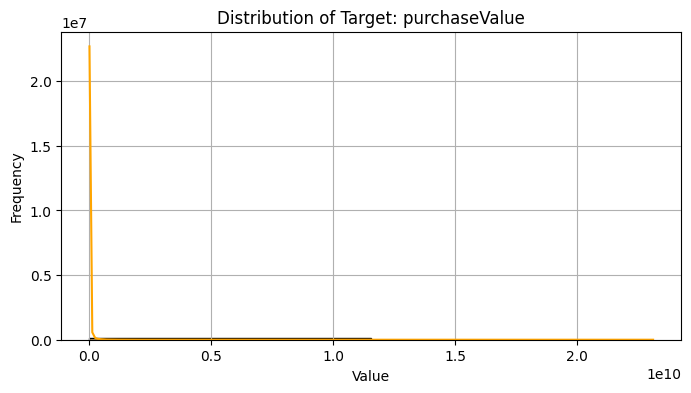

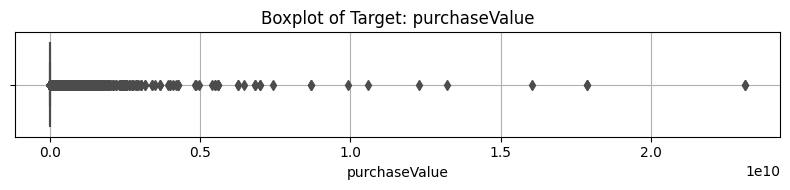

In [13]:
target_col = 'purchaseValue'

print("Summary Statistics for Target Column:")
print(train_data[target_col].describe())

print("Target Through Graphs")
plt.figure(figsize=(8, 4))
sns.histplot(train_data[target_col], bins=2, kde=True, color='orange')
plt.title(f"Distribution of Target: {target_col}")
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Boxplot to visualize outliers
plt.figure(figsize=(8, 2))
sns.boxplot(x=train_data[target_col], color='orange')
plt.title(f"Boxplot of Target: {target_col}")
plt.grid(True)
plt.tight_layout()
plt.show()

- Most values are very small — the majority of purchase values are concentrated near zero.

- A few extreme outliers — there are some extremely large purchase values which heavily stretch the x-axis.

- Non-normal distribution — the data is far from normally distributed, making raw use in regression models problematic.

- High variance — the wide range of values suggests high variability, which can affect model stability.

## Features Detection

In [14]:
# Identify columns with more than 70% missing (null) values
nulls_columns = []
print("\nThese columns have high null values (more than 70% missing):")
threshold = train_data.shape[0] * 0.7

for col in train_data.columns:
    null_count = train_data[col].isna().sum()
    if null_count > threshold:
        print(f" - {col} => {null_count} nulls")
        nulls_columns.append(col)


These columns have high null values (more than 70% missing):
 - trafficSource.adContent => 113060 nulls
 - trafficSource.adwordsClickInfo.slot => 111742 nulls
 - trafficSource.adwordsClickInfo.isVideoAd => 111742 nulls
 - trafficSource.adwordsClickInfo.adNetworkType => 111742 nulls
 - trafficSource.adwordsClickInfo.page => 111742 nulls


Conclusion:

- These columns have over 70% missing values, indicating low data reliability.
    - trafficSource.adContent 
    - trafficSource.adwordsClickInfo.slot
    - trafficSource.adwordsClickInfo.isVideoAd
    - trafficSource.adwordsClickInfo.adNetworkType
    - trafficSource.adwordsClickInfo.page 

- Most are related to AdWords or traffic source metadata, which may not be consistently tracked.

- Their high null rates could introduce noise or bias if imputed without caution.

- Such columns are strong candidates for removal, unless domain knowledge suggests otherwise.



In [15]:
# Extract numerical columns
numerical_cols = train_data.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("\nThese are Numerical columns:")
for col in numerical_cols:
    print(f" - {col}")
# Extract categorical columns
object_cols = train_data.select_dtypes(include=['object']).columns.tolist()
print("\nThese Object columns:")
for col in object_cols:
    print(f" - {col}")


These are Numerical columns:
 - purchaseValue
 - userId
 - gclIdPresent
 - sessionNumber
 - totals.visits
 - sessionId
 - trafficSource.adwordsClickInfo.page
 - pageViews
 - locationZone
 - totals.bounces
 - date
 - totalHits
 - sessionStart
 - new_visits

These Object columns:
 - trafficSource.isTrueDirect
 - browser
 - device.screenResolution
 - trafficSource.adContent
 - trafficSource.keyword
 - screenSize
 - geoCluster
 - trafficSource.adwordsClickInfo.slot
 - device.mobileDeviceBranding
 - device.mobileInputSelector
 - trafficSource.campaign
 - device.mobileDeviceMarketingName
 - geoNetwork.networkDomain
 - device.operatingSystemVersion
 - device.flashVersion
 - geoNetwork.region
 - trafficSource
 - geoNetwork.networkLocation
 - os
 - geoNetwork.subContinent
 - trafficSource.medium
 - trafficSource.adwordsClickInfo.isVideoAd
 - browserMajor
 - locationCountry
 - device.browserSize
 - trafficSource.adwordsClickInfo.adNetworkType
 - socialEngagementType
 - geoNetwork.city
 - geoNet

In [16]:
# result
print("No. of Nulls columns: ",len(nulls_columns))
print("No. of Numerical columns: ",len(numerical_cols))
print("No. of Object(string) columns: ",len(object_cols))

No. of Nulls columns:  5
No. of Numerical columns:  14
No. of Object(string) columns:  37


In [17]:
# For Data Originality
train = train_data.copy()
test = test_data.copy()
print("copied!!")

copied!!


# Preprocessing

## Null columns Droping

In [18]:
columns_to_drop = nulls_columns
# droping high nulls Value columns
train.drop(columns=columns_to_drop, inplace=True, errors='ignore')
test.drop(columns=columns_to_drop, inplace=True, errors='ignore')

print("High-null columns dropped successfully from both datasets.")

#Identify columns having constant Value 
train_const_cols = [col for col in train.columns if train[col].nunique() == 1]
test_const_cols = [col for col in test.columns if test[col].nunique() == 1]

# Droping columns having constant Value 
train.drop(columns=train_const_cols, inplace=True, errors='ignore')
test.drop(columns=test_const_cols, inplace=True, errors='ignore')

print("Constant (zero variance) columns dropped successfully.")

all_dropped_cols = set(nulls_columns + train_const_cols + test_const_cols)

print("Columns removed from train/test datasets:")
for col in sorted(all_dropped_cols):
    print(f" - {col}")

High-null columns dropped successfully from both datasets.
Constant (zero variance) columns dropped successfully.
Columns removed from train/test datasets:
 - browserMajor
 - device.browserSize
 - device.browserVersion
 - device.flashVersion
 - device.language
 - device.mobileDeviceBranding
 - device.mobileDeviceMarketingName
 - device.mobileDeviceModel
 - device.mobileInputSelector
 - device.operatingSystemVersion
 - device.screenColors
 - device.screenResolution
 - geoNetwork.networkLocation
 - locationZone
 - new_visits
 - screenSize
 - socialEngagementType
 - totals.bounces
 - totals.visits
 - trafficSource.adContent
 - trafficSource.adwordsClickInfo.adNetworkType
 - trafficSource.adwordsClickInfo.isVideoAd
 - trafficSource.adwordsClickInfo.page
 - trafficSource.adwordsClickInfo.slot
 - trafficSource.isTrueDirect


In [19]:
print("Many Columns are Droped.\nSo, here we reselect numerical and catogorical columns")
# Numerical columns (int or float)
numerical_cols = train.select_dtypes(include=['int64', 'float64']).columns.tolist()
# Object or string columns
object_cols = train.select_dtypes(include='object').columns.tolist()
print("No. of Numerical columns after Droping: ", len(numerical_cols))
print("No. of Object columns after Droping: ", len(object_cols))

Many Columns are Droped.
So, here we reselect numerical and catogorical columns
No. of Numerical columns after Droping:  9
No. of Object columns after Droping:  17


## Numerical Columns Preproccessing

In [20]:
print("Missing Value in Numerical Columns:")
train[numerical_cols].isna().sum()

Missing Value in Numerical Columns:


purchaseValue    0
userId           0
gclIdPresent     0
sessionNumber    0
sessionId        0
pageViews        8
date             0
totalHits        0
sessionStart     0
dtype: int64

In [21]:
id_columns = ['userId', 'sessionId', 'sessionStart',"gclIdPresent"]

# Drop from train and test datasets
train.drop(columns=id_columns, inplace=True, errors='ignore')
test.drop(columns=id_columns, inplace=True, errors='ignore')

print("ID-like columns dropped successfully:")
for col in id_columns:
    print(f" - {col}")

ID-like columns dropped successfully:
 - userId
 - sessionId
 - sessionStart
 - gclIdPresent


Imputaion In Numerical Columns

In [22]:
from sklearn.impute import SimpleImputer

# Specify columns to impute
impute_cols = ["pageViews"]

imputer = SimpleImputer(strategy="most_frequent")

# Apply imputation on both train and test
train[impute_cols] = imputer.fit_transform(train[impute_cols])
test[impute_cols] = imputer.transform(test[impute_cols])
print("Imputed with Simple Imputer")

Imputed with Simple Imputer


In [23]:

# Convert the 'date' column to datetime format from YYYYMMDD integer format
train['date'] = pd.to_datetime(train['date'].astype(str), format='%Y%m%d')
test['date'] = pd.to_datetime(test['date'].astype(str), format='%Y%m%d')

# After conversion Extracting the month from the 'date' column
train['month'] = train['date'].dt.month
test['month'] = test['date'].dt.month


# Drop the original columns used to create 'engevalue' (only if no longer needed)
train.drop(columns=['date'], inplace=True)
test.drop(columns=['date'], inplace=True)
 
print("'month' created. Original columns were dropped.")


'month' created. Original columns were dropped.


## object Columns Preproccessing

In [24]:
train[object_cols].isna().sum()

browser                           0
trafficSource.keyword         71861
geoCluster                        0
trafficSource.campaign            0
geoNetwork.networkDomain          0
geoNetwork.region                 0
trafficSource                     0
os                                0
geoNetwork.subContinent           0
trafficSource.medium              0
locationCountry                   0
geoNetwork.city                   0
geoNetwork.metro                  0
trafficSource.referralPath    73309
deviceType                        0
userChannel                       0
geoNetwork.continent              0
dtype: int64

In [25]:
import numpy as np

print("===== Data Cleaning: Replacing Placeholder Strings with NaN =====\n")

# Define placeholder mappings
placeholders = {
    'browser': ['(not set)'],
    "geoNetwork.city":["not available in demo dataset"],
    'trafficSource.keyword' : ["(not provided)"],
    'trafficSource.campaign': ['(not set)'],
    'geoNetwork.region': ['(not set)', 'not available in demo dataset'],
    'trafficSource.medium': ['(none)', '(not set)'],
    'geoNetwork.metro': ['(not set)', 'not available in demo dataset']
}

# Apply to both train and test
for df_name, df in [('TRAIN', train), ('TEST', test)]:
    print(f"Processing: {df_name} SET")
    for col, values in placeholders.items():
        print(f" - Replacing {values} in '{col}'")
        df[col].replace(values, np.nan, inplace=True)
    print(f"Finished cleaning {df_name} set.\n")

print("All placeholder strings have been successfully replaced with NaN.")


===== Data Cleaning: Replacing Placeholder Strings with NaN =====

Processing: TRAIN SET
 - Replacing ['(not set)'] in 'browser'
 - Replacing ['not available in demo dataset'] in 'geoNetwork.city'
 - Replacing ['(not provided)'] in 'trafficSource.keyword'
 - Replacing ['(not set)'] in 'trafficSource.campaign'
 - Replacing ['(not set)', 'not available in demo dataset'] in 'geoNetwork.region'
 - Replacing ['(none)', '(not set)'] in 'trafficSource.medium'
 - Replacing ['(not set)', 'not available in demo dataset'] in 'geoNetwork.metro'
Finished cleaning TRAIN set.

Processing: TEST SET
 - Replacing ['(not set)'] in 'browser'
 - Replacing ['not available in demo dataset'] in 'geoNetwork.city'
 - Replacing ['(not provided)'] in 'trafficSource.keyword'
 - Replacing ['(not set)'] in 'trafficSource.campaign'
 - Replacing ['(not set)', 'not available in demo dataset'] in 'geoNetwork.region'
 - Replacing ['(none)', '(not set)'] in 'trafficSource.medium'
 - Replacing ['(not set)', 'not available 

**After some replacments, there are still null columns**

In [26]:
print("Some Missing Value After Replacements")
train[object_cols].isna().sum()

Some Missing Value After Replacements


browser                            1
trafficSource.keyword         110927
geoCluster                         0
trafficSource.campaign        110280
geoNetwork.networkDomain           0
geoNetwork.region              62944
trafficSource                      0
os                                 0
geoNetwork.subContinent            0
trafficSource.medium           36847
locationCountry                    0
geoNetwork.city                60138
geoNetwork.metro               81779
trafficSource.referralPath     73309
deviceType                         0
userChannel                        0
geoNetwork.continent               0
dtype: int64

In [27]:
# Identify columns with more than 70% missing (null) values after some replace ment
nulls_columns = []
print("\nThese columns have high null values \n(more than 70% missing) ")
threshold = train.shape[0] * 0.7

for col in train.columns:
    null_count = train[col].isna().sum()
    if null_count > threshold:
        print(f" - {col} => {null_count} nulls")
        nulls_columns.append(col)
        
# droping columns
train.drop(columns=nulls_columns, inplace=True, errors='ignore')
test.drop(columns=nulls_columns, inplace=True, errors='ignore')


These columns have high null values 
(more than 70% missing) 
 - trafficSource.keyword => 110927 nulls
 - trafficSource.campaign => 110280 nulls
 - geoNetwork.metro => 81779 nulls


In [28]:
from sklearn.impute import SimpleImputer

impute_cols = ["trafficSource.medium", "geoNetwork.region","browser",
               "geoNetwork.city","trafficSource.referralPath"]
imputer = SimpleImputer(strategy="most_frequent")

# Apply the transformation to both train and test sets (if test has same columns)
train[impute_cols] = imputer.fit_transform(train[impute_cols])
test[impute_cols] = imputer.transform(test[impute_cols])
print("Imputed With Simple Imputer!")

Imputed With Simple Imputer!


## Preproccessing Results: 

In [29]:
print("Overall Missing Value in Datasets")
print("In Train dataset")
print(train.info())
print("=============")
print("In Test dataset")
print(test.info())

Overall Missing Value in Datasets
In Train dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116023 entries, 0 to 116022
Data columns (total 20 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   purchaseValue               116023 non-null  float64
 1   browser                     116023 non-null  object 
 2   geoCluster                  116023 non-null  object 
 3   geoNetwork.networkDomain    116023 non-null  object 
 4   sessionNumber               116023 non-null  int64  
 5   geoNetwork.region           116023 non-null  object 
 6   trafficSource               116023 non-null  object 
 7   os                          116023 non-null  object 
 8   geoNetwork.subContinent     116023 non-null  object 
 9   trafficSource.medium        116023 non-null  object 
 10  locationCountry             116023 non-null  object 
 11  geoNetwork.city             116023 non-null  object 
 12  pageViews            

In [30]:
print(f"Rows X Columns in Train {train.shape}.\nRow X Columns in test {test.shape} ")

Rows X Columns in Train (116023, 20).
Row X Columns in test (29006, 19) 


# splits

In [31]:
# Separate features and target
X = train.drop("purchaseValue", axis=1)
y = train["purchaseValue"]
print("'train.csv' is divided into features (X) and target (y).\n")

# Split into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=43)

# Print shape information
print("======== Dataset Splitting ========")
print(f"Shape of x_train : {x_train.shape}")
print(f"Shape of y_train : {y_train.shape}")
print(f"Shape of x_test  : {x_test.shape}")
print(f"Shape of y_test  : {y_test.shape}")


'train.csv' is divided into features (X) and target (y).

======== Dataset Splitting ========
Shape of x_train : (92818, 19)
Shape of y_train : (92818,)
Shape of x_test  : (23205, 19)
Shape of y_test  : (23205,)


In [32]:
# Identify numerical and categorical columns
numerical_cols = x_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
object_cols = x_train.select_dtypes(include='object').columns.tolist()

# Store unique value counts for efficiency
unique_counts = {col: df[col].nunique() for col in object_cols}

# Categorical columns: high cardinality (5–400 unique values)
categorical_cols = [col for col, count in unique_counts.items() if 3 < count <= 400]

# Showing summary
print("=== Feature Selection Summary ===")
print(f"Numerical Columns ({len(numerical_cols)}): {numerical_cols}")
print(f"\nCategorical ({len(categorical_cols)}): {categorical_cols}")

=== Feature Selection Summary ===
Numerical Columns (3): ['sessionNumber', 'pageViews', 'totalHits']

Categorical (10): ['browser', 'geoCluster', 'geoNetwork.region', 'trafficSource', 'os', 'geoNetwork.subContinent', 'trafficSource.medium', 'locationCountry', 'userChannel', 'geoNetwork.continent']


In [49]:
# Target transform
y_train_log = np.log1p(y_train)

In [33]:
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=ConvergenceWarning)
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import r2_score, mean_absolute_error
print("Some Usefull Liberies for evaluation")

Some Usefull Liberies for evaluation


# Dummy Model

In [53]:
from sklearn.dummy import DummyRegressor

dummy_model = DummyRegressor(strategy='median')
dummy_model.fit(x_train, y_train)

y_pred_dummy = dummy_model.predict(x_test)

# Evaluate
print("Dummy Model Score:", r2_score(y_test, y_pred_dummy))

Dummy Model Score: -0.011872251494960073


# Ridge Regression (Model 1) with Hyperparameter Tuning
 

In [54]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Encoding
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numerical_cols),
    ('cat1', OrdinalEncoder(handle_unknown='use_encoded_value', 
                           unknown_value=-1), categorical_cols)
])

# Baseline Ridge model pipeline
ridge_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', Ridge(random_state=43))
])

#  Hyperparameter grid for alpha
param_grid = {
    'model__alpha': [0.01, 0.1, 1, 10, 100]
}

#  Grid search with 5-fold cross-validation
ridge_grid = GridSearchCV(
    estimator=ridge_pipeline,
    param_grid=param_grid,
    cv=3,
    scoring='r2',
    n_jobs=-1
)

#  Fit on training data
ridge_grid.fit(x_train, y_train_log)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['sessionNumber',
                                                                          'pageViews',
                                                                          'totalHits']),
                                                                        ('cat1',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         ['browser',
                                                                          'geoCluster',
                                                                          'geoNetwork.region',
                                                                          'trafficSource',
                                                                          'os',
                                                                          'geoNetwork.subContinent',
                                                                          'trafficSource.medium',
                                                                          'locationCountry',
                                                                          'userChannel',
                                                                          'geoNetwork.continent'])])),
                                       ('model', Ridge(random_state=43))]),
             n_jobs=-1, param_grid={'model__alpha': [0.01, 0.1, 1, 10, 100]},
             scoring='r2')

In [56]:
y_pred_ridge = ridge_grid.predict(x_test)
test_r2 = r2_score(y_test, y_pred_ridge)
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_ridge))

print("Best Parameters:", ridge_grid.best_params_)
print(f"Test R² Score: {test_r2:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")

Best Parameters: {'model__alpha': 100}
Test R² Score: -0.0119
Test RMSE: 248764629.0331


#  LightGBM Regressor (Model 2)

In [71]:
from lightgbm import LGBMRegressor
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_cols),
    ('cat1', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), categorical_cols)    
])

# LightGBM Pipeline

LGBpipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('model', LGBMRegressor(n_estimators = 100, subsample_for_bin = 2000))
])

LGBpipeline.fit(x_train, y_train)


[LightGBM] [Warning] Using too small ``bin_construct_sample_cnt`` may encounter unexpected errors and poor accuracy.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005387 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 378
[LightGBM] [Info] Number of data points in the train set: 92818, number of used features: 13
[LightGBM] [Info] Start training from score 26468441.133056


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['sessionNumber', 'pageViews',
                                                   'totalHits']),
                                                 ('cat1',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['browser', 'geoCluster',
                                                   'geoNetwork.region',
                                                   'trafficSource', 'os',
                                                   'geoNetwork.subContinent',
                                                   'trafficSource.medium',
                                                   'locationCountry',
                                                   'userChannel',
                                                   'geoNetwork.continent'])])),
                ('model', LGBMRegressor(subsample_for_bin=2000))])

In [72]:
# Predict using LightGBM pipeline
y_pred_lgb = LGBpipeline.predict(x_test)

# Evaluate R² Score
r2_lgb = r2_score(y_test, y_pred_lgb)
test_mae = mean_absolute_error(y_test, y_pred_lgb)

# Displaimg results
print("LightGBM Regressor - Test Set Evaluation")
print(f"R² Score : {r2_lgb:.4f}")
print(f"Mean Absolute Error(MAE) : {test_mae:.4f}")

LightGBM Regressor - Test Set Evaluation
R² Score : 0.4489
Mean Absolute Error(MAE) : 26320691.4031


## Hyperparameter Tuning On Model 2

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Light version of hyperparameter grid 
param_dist = {
    'model__n_estimators': [100, 300],               
    'model__learning_rate': [0.05, 0.1],             
    'model__max_depth': [3, 4],
    "model__subsample_for_bin":[1000, 2000]
}
# RandomizedSearchCV 
lgm_random_search = RandomizedSearchCV(
    LGBpipeline,
    param_distributions=param_dist,
    n_iter=10,                  
    scoring='neg_root_mean_squared_error',
    cv=5,                     
    verbose=1,
    n_jobs=-1,                 
    random_state=42
)

# Fitting to training data
lgm_random_search.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] Using too small ``bin_construct_sample_cnt`` may encounter unexpected errors and poor accuracy.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012882 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 298
[LightGBM] [Info] Number of data points in the train set: 74254, number of used features: 13
[LightGBM] [Info] Start training from score 26444966.862499
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spl

In [68]:
tune_model = lgm_random_search.best_estimator_

# Predict on test data
y_pred_tune_lgm = tune_model.predict(x_test)

# Evaluation
print(f" Tuned R² Score  : {r2_score(y_test, y_pred_tune_lgm):.4f}")
print(f" Tuned Mean Squared Error (MSE)       : {mean_squared_error(y_test, y_pred_tune_lgm):.4f}")
print(f" Best Parameter: {lgm_random_search.best_params_}")

 Tuned R² Score  : 0.4058
 Tuned Mean Squared Error (MSE)       : 36339556010680288.0000
 Best Parameter: {'model__subsample_for_bin': 2000, 'model__n_estimators': 100, 'model__max_depth': 4, 'model__learning_rate': 0.1}


# XGB Regressor(model 3)

In [41]:
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from xgboost import XGBRegressor

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_cols),
    ('cat1', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), categorical_cols)
])

# Define model pipeline
XGBpipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', XGBRegressor(booster="gbtree"))
])

# Train the model
XGBpipeline.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['sessionNumber', 'pageViews',
                                                   'totalHits']),
                                                 ('cat1',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['browser', 'geoCluster',
                                                   'geoNetwork.region',
                                                   'trafficSource', 'os',
                                                   'geoNetwork.subContinent',
                                                   'trafficSource.medium',
                                                   'locationCountry',
                                                   'userChanne...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

In [42]:
# Make predictions using the trained XGBoost pipeline
y_pred_xgb = XGBpipeline.predict(x_test)

# Evaluate model performance
r2 = r2_score(y_test, y_pred_xgb)
mse = mean_squared_error(y_test, y_pred_xgb)

# Display results
print("=== XGBoost Regressor Evaluation ===")
print(f"R² Score              : {r2:.4f}")
print(f"Mean Squared Error    : {mse:.4f}")

=== XGBoost Regressor Evaluation ===
R² Score              : 0.7121
Mean Squared Error    : 17605818667666702.0000


# RandomForest Regressor (Model 4)

In [43]:
from sklearn.ensemble import RandomForestRegressor
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numerical_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), categorical_cols)
])

# Random Forest Regressor Pipeline
rf_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(
        n_estimators=100,
        max_depth=5,
        random_state=42,
        n_jobs=-1
    ))
])

# Fit model
rf_pipe.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['sessionNumber', 'pageViews',
                                                   'totalHits']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['browser', 'geoCluster',
                                                   'geoNetwork.region',
                                                   'trafficSource', 'os',
                                                   'geoNetwork.subContinent',
                                                   'trafficSource.medium',
                                                   'locationCountry',
                                                   'userChannel',
                                                   'geoNetwork.continent'])])),
                ('regressor',
                 RandomForestRegressor(max_depth=5, n_jobs=-1,
                                       random_state=42))])

In [44]:
# Make predictions using the trained Random Forest pipeline
y_pred_rf = rf_pipe.predict(x_test)

# Evaluate model performance
r2 = r2_score(y_test, y_pred_rf)
mse = mean_squared_error(y_test, y_pred_rf)
rmse = np.sqrt(mse)  # Root Mean Squared Error

# Display results
print("=== Random Forest Regressor Evaluation ===")
print(f"R² Score              : {r2:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")


=== Random Forest Regressor Evaluation ===
R² Score              : 0.6208
Root Mean Squared Error: 152280236.6597


# GradientBoosting Regressor (Model 5)

In [45]:
from sklearn.ensemble import GradientBoostingRegressor

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), categorical_cols)
    ]
)

#  Create a pipeline with Gradient Boosting Regressor
gb_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor())
])

#  Fit the model
gb_pipe.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['sessionNumber', 'pageViews',
                                                   'totalHits']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['browser', 'geoCluster',
                                                   'geoNetwork.region',
                                                   'trafficSource', 'os',
                                                   'geoNetwork.subContinent',
                                                   'trafficSource.medium',
                                                   'locationCountry',
                                                   'userChannel',
                                                   'geoNetwork.continent'])])),
                ('regressor', GradientBoostingRegressor())])

In [46]:
# Make predictions using the trained Gradient Boosting pipeline
y_pred_gb = gb_pipe.predict(x_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred_gb)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_gb)

# Display results
print("=== Gradient Boosting Regressor Evaluation ===")
print(f"R² Score               : {r2:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")

=== Gradient Boosting Regressor Evaluation ===
R² Score               : 0.6155
Root Mean Squared Error: 153340024.4043


# Model Comparisen

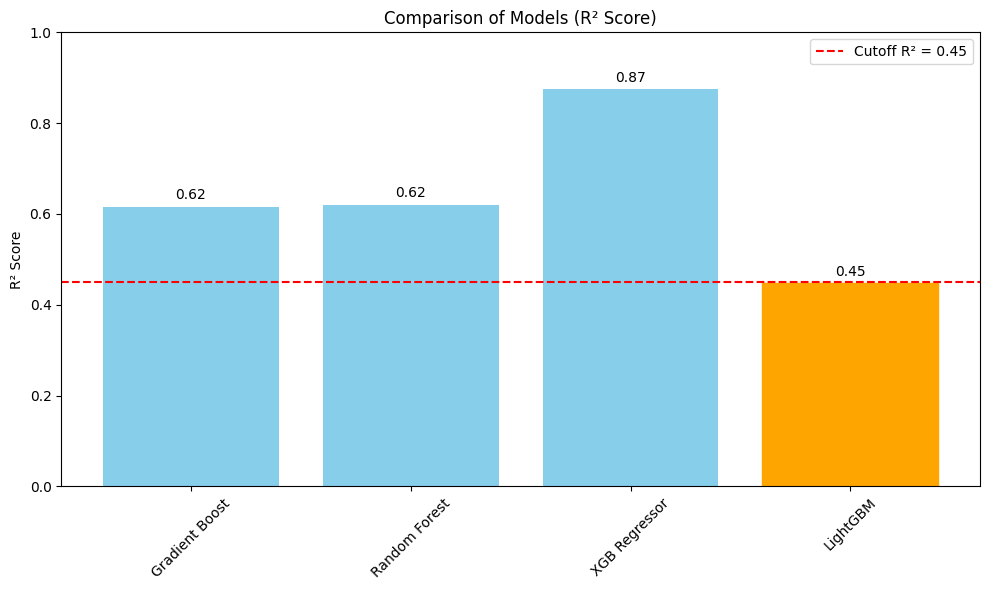

In [58]:
trained_models = {
    'Gradient Boost':gb_pipe,
    'Random Forest': rf_pipe,                 
    'XGB Regressor': XGBpipeline,
    'LightGBM': tune_model,
}

# Evaluate each model
model_scores = {}

for name, model in trained_models.items():
    y_pred = model.predict(x_test)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    
    model_scores[name] = {
        'R2': round(r2, 4),
        'MAE': round(mae, 2),
        'MSE': round(mse, 2)
    }
plt.figure(figsize=(10, 6))
names = list(model_scores.keys())
r2_values = [model_scores[name]['R2'] for name in names]

bars = plt.bar(names, r2_values, color='skyblue')
plt.axhline(y=0.45, color='red', linestyle='--', label='Cutoff R² = 0.45')
plt.ylabel('R² Score')
plt.title('Comparison of Models (R² Score)')
plt.ylim(0, 1)
plt.legend()

# Annotate bars with values and highlight below cutoff
for bar, score in zip(bars, r2_values):
    if score < 0.45:
        bar.set_color('orange')
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01,
             f'{score:.2f}', ha='center', va='bottom')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Kaggle Submission

In [48]:
# Predict on final test.csv
XGBpipeline.fit(X, y)

kaggle_pred = XGBpipeline.predict(test)

# Prepare submission
sub = pd.DataFrame({
    "id": test["id"] if "id" in test.columns else range(len(kaggle_pred)),
    "purchaseValue": kaggle_pred
})

sub.to_csv("submission.csv", index=False)
print("submission.csv file is created successfully!")

submission.csv file is created successfully!
